### Importing Libraries

In [33]:
import os
from keras.preprocessing import image
import numpy as np
from keras.utils.np_utils import to_categorical
import random, shutil
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization
from keras.models import load_model
import matplotlib.pyplot as plt

In [16]:
BATCH_SIZE = 32
TARGET_SIZE = (24,24)

### Preparing Data

In [19]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True, batch_size=1, target_size=(24, 24), class_mode='categorical'):
    return gen.flow_from_directory(dir, batch_size=batch_size, shuffle=shuffle, color_mode='grayscale', class_mode=class_mode, target_size=target_size)

train_data = generator('data/train', batch_size=BATCH_SIZE, target_size=TARGET_SIZE)
test_data = generator('data/test', batch_size=BATCH_SIZE, target_size=TARGET_SIZE)

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [20]:
STEPS_PER_EPOCH = len(train_data.classes)//BATCH_SIZE
VALIDATION_STEPS = len(test_data.classes)//BATCH_SIZE
print(STEPS_PER_EPOCH, VALIDATION_STEPS)

38 6


### Model

In [25]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Dropout(0.4),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 128)       

In [27]:
history = model.fit_generator(train_data, validation_data=test_data, epochs=20, steps_per_epoch=STEPS_PER_EPOCH, validation_steps=VALIDATION_STEPS)
model.save('models/cnnCat2.h5', overwrite=True)

Epoch 1/20


C:\Users\kusha\AppData\Local\Temp\ipykernel_34572\4195060415.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, validation_data=test_data, epochs=20, steps_per_epoch=STEPS_PER_EPOCH, validation_steps=VALIDATION_STEPS)


38/38 [==============================] - 3s 77ms/step - loss: 0.6496 - accuracy: 0.6547 - val_loss: 0.5083 - val_accuracy: 0.6771
Epoch 2/20
38/38 [==============================] - 2s 48ms/step - loss: 0.4309 - accuracy: 0.8128 - val_loss: 0.2574 - val_accuracy: 0.8854
Epoch 3/20
38/38 [==============================] - 2s 48ms/step - loss: 0.2768 - accuracy: 0.8985 - val_loss: 0.2014 - val_accuracy: 0.9427
Epoch 4/20
38/38 [==============================] - 2s 45ms/step - loss: 0.2069 - accuracy: 0.9285 - val_loss: 0.1475 - val_accuracy: 0.9531
Epoch 5/20
38/38 [==============================] - 2s 45ms/step - loss: 0.1629 - accuracy: 0.9351 - val_loss: 0.1158 - val_accuracy: 0.9479
Epoch 6/20
38/38 [==============================] - 2s 45ms/step - loss: 0.1266 - accuracy: 0.9539 - val_loss: 0.1336 - val_accuracy: 0.9531
Epoch 7/20
38/38 [==============================] - 2s 48ms/step - loss: 0.0953 - accuracy: 0.9642 - val_loss: 0.1002 - val_accuracy: 0.9740
Epoch 8/20
38/38 [======

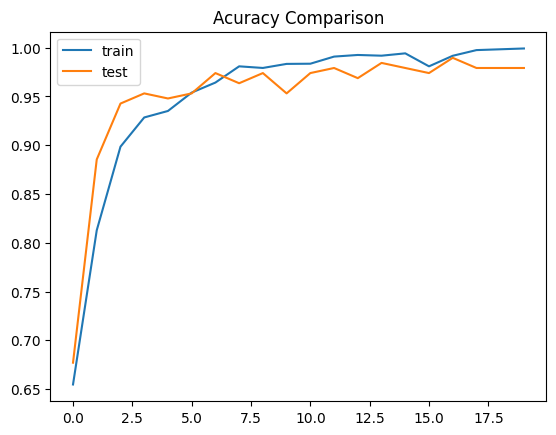

In [28]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.title("Acuracy Comparison")
plt.legend()
plt.show()